Условие - https://drive.google.com/drive/u/0/folders/1QnpYNh_N0sABgY7Cvn_1WbFtmk4_IP5y


# Задача №1


Инициализация, BootstrepedDistribution - класс для вычисления бутстрепа.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import pandas as pd
from scipy.special import factorial
import warnings

class BootstrepedDistribution:
    def __init__(self, np_distribution_class, bootstrep_size, sample_size, thetas, *args, **kwargs):
        self._sps_distribution_class = np_distribution_class

        try:
            self._sps_distribution = np_distribution_class(*args)
        except Exception:
            self._sps_distribution = None

        self._thetas = thetas
        self._distrib_params = args
        self._bootstrep_size = bootstrep_size
        self._sample_size = sample_size

    def get_param_bootstrep(self, n, estimator, estimator_func):  #
        bootstrap_estimators = np.zeros(self._bootstrep_size)
        bootstrap_param_samples = self._sps_distribution_class(estimator) \
            .rvs((self._bootstrep_size, n))

        for k in range(self._bootstrep_size):
            bootstrap_estimators[k] = estimator_func(bootstrap_param_samples[k])

        return bootstrap_estimators

    def get_bootstrep_variance(self, bootstrep_func, bootstrep_estimate_func, estimator_func):
        bootstrap_variance_estimators = np.zeros(len(self._thetas))
        for i, theta in enumerate(self._thetas):
            sample = self._sps_distribution_class(theta).rvs(size=self._sample_size)
            effective_estimator = estimator_func(sample)
            bootstrap_variance_estimators[i] = self._s2(
                bootstrep_func(self, self._sample_size, effective_estimator, bootstrep_estimate_func))

        return bootstrap_variance_estimators

    def _s2(self, bootstrap_estimators):
        return np.mean(bootstrap_estimators ** 2) - np.mean(bootstrap_estimators) ** 2

    def get_estimators(self, sample, estimators_func):
        params = [estimators_func(sample[:n]) for n in range(1, sample.shape[0])]
        params.append(estimators_func(sample))

        return params

RANDVAR_COUNT = 200
BOOTSTREP_SIZE = 200


Создадим сетку и вычислим нижнюю оценку дисперисии - $\frac{1}{I_X(\theta)}$ в неравенстве Рао-Крамера, которая у распределения Бернулли $\frac{\theta (1 - \theta)}{N}$


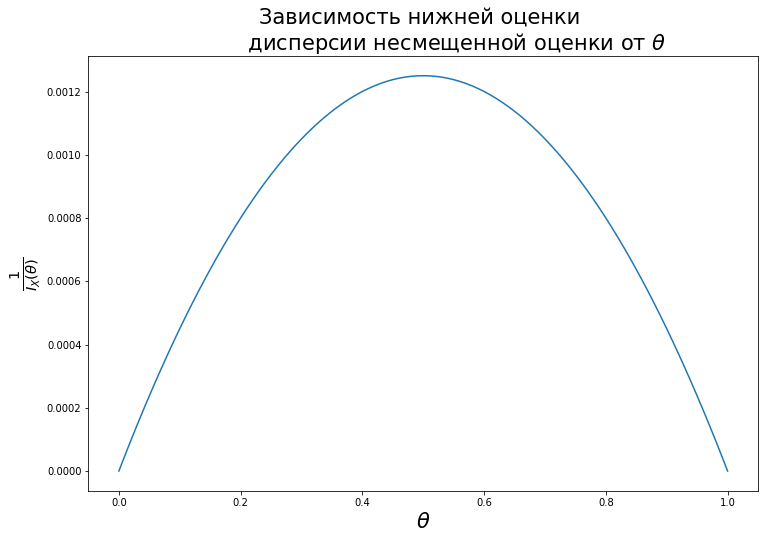

In [10]:

thetas = np.linspace(0, 1, 101)
rao_kramers_estimation = thetas * (1 - thetas) / RANDVAR_COUNT

plt.figure(figsize=(12, 8))
plt.plot(thetas, rao_kramers_estimation)
plt.title(r"""Зависимость нижней оценки 
          дисперсии несмещенной оценки от $\theta$""", fontsize=21)
plt.xlabel(r"$\theta$", fontsize=21)
plt.ylabel(r"$\frac{1}{I_X(\theta)}$", fontsize=21)
plt.show()


По графику можно судить, что нижняя оценка достигает максимума при $\theta=0.5$ и она симметрична относительно прямой $\theta=0.5$. 


Построим бутстрепную оценку дисперсии эффективной оценки, в данном случае это mean. Т.е. сначала считаем эффективную оценку для сетки, а потом её бутстрепную оценку.
Размер выборки = 1000, а количество бутстрепных выборок = 500 


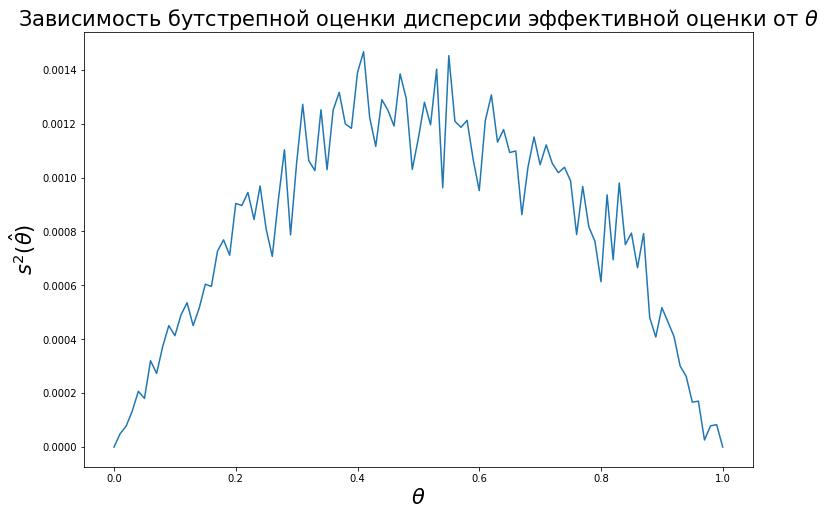

In [12]:
distrib = BootstrepedDistribution(sps.bernoulli, BOOTSTREP_SIZE, RANDVAR_COUNT, thetas)
variance_estimation = distrib.get_bootstrep_variance(BootstrepedDistribution.get_param_bootstrep, np.mean, np.mean)

plt.figure(figsize=(12, 8))
plt.plot(thetas, variance_estimation)
plt.title(r"""Зависимость бутстрепной оценки дисперсии эффективной оценки от $\theta$""", fontsize=21)
plt.xlabel(r"$\theta$", fontsize=21)
plt.ylabel(r"$s^2(\hat{\theta})$", fontsize=21)

plt.show()


Сравним данные графики.


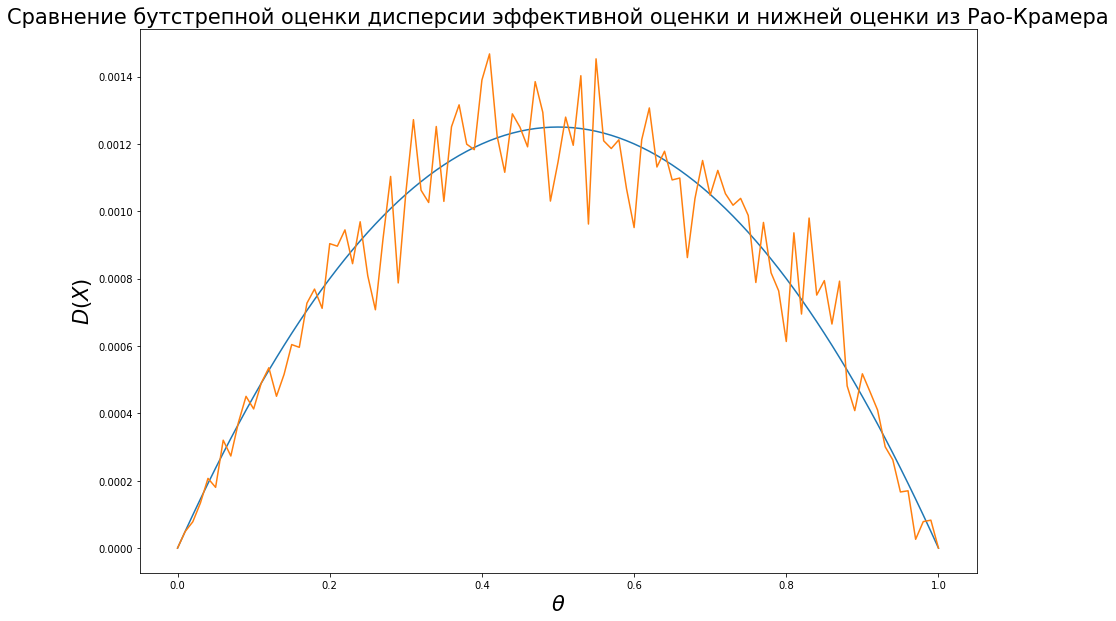

In [21]:
plt.figure(figsize=(15, 10))
plt.plot(thetas, rao_kramers_estimation)
plt.plot(thetas, variance_estimation)

plt.title(r"""Сравнение бутстрепной оценки дисперсии эффективной оценки и нижней оценки из Рао-Крамера""", fontsize=21)
plt.xlabel(r"$\theta$", fontsize=21)
plt.ylabel(r"$D(X)$", fontsize=21)

plt.show()


Как мы можем увидеть, бутстрепная оценка дисперсии эффективной оценки хорошо апроксимирует 
нижнюю оценку дисперсии из неравенства Рао-Крамера. Поэтому вывод - бутстрепный метод хорош для приближения дисперсии эффективных оценок, как мы видим его почти нельзя улучшить.
